In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
from scipy.stats import expon,norm
import numpy as np

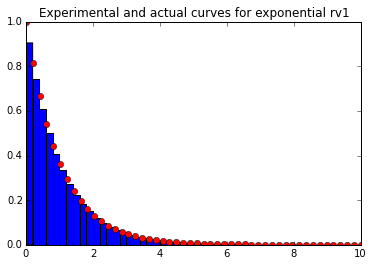

In [3]:
rv1 = expon(0)
values1 = rv1.rvs(1000000)
plt.hist(values1, range=(0,10), bins=50,normed=True)
x = np.linspace(0, 10)
plt.plot(x, rv1.pdf(x), 'ro')
plt.title ( "Experimental and actual curves for exponential rv1")

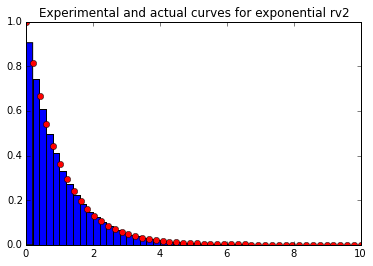

In [4]:
rv2 = expon(0)
values2 = rv2.rvs(1000000)
plt.hist(values2, range=(0,10), bins=50,normed=True)
x = np.linspace(0, 10)
plt.plot(x, rv2.pdf(x), 'ro')
plt.title ( "Experimental and actual curves for exponential rv2")

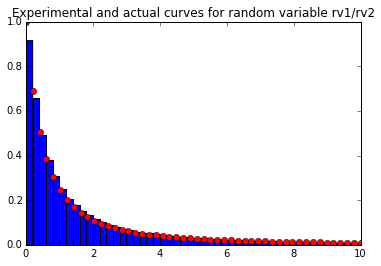

In [5]:
net = values1/values2
x=np.linspace(0,10)
def plot_actual(x):
    return 1/((x+1)*(x+1))
plt.plot(x,plot_actual(x),'ro')
plt.hist(net,normed = 'True',range = (0,10), bins = 50)
plt.title("Experimental and actual curves for random variable rv1/rv2")

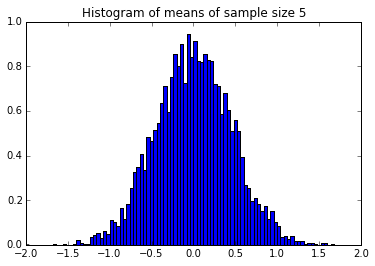

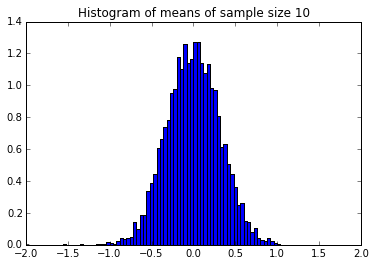

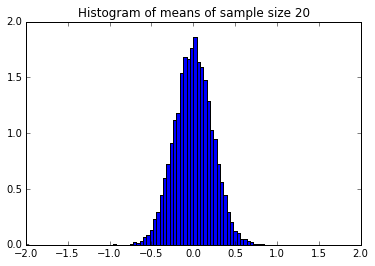

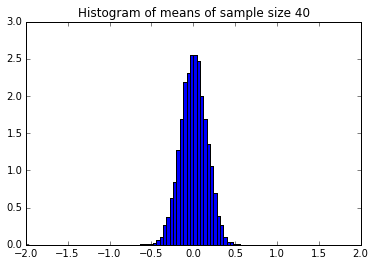

In [6]:
val1 = []
val2 = []
val3 = []
val4 = []
size=5
rvalues = [val1,val2,val3,val4]
for i in range(4):
    for j in range(5000):
        values = norm(0,1).rvs(size)
        rvalues[i].append(values.mean())
    plt.figure().add_subplot(1, 1, 1).hist(rvalues[i],range = (-2,2), bins=100, normed="True")
    plt.title("Histogram of means of sample size " + str(size))
    size *=2

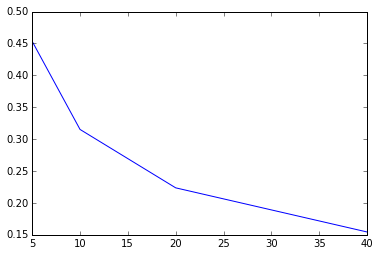

In [7]:
x = [5,10,20,40]
std = []
for i in range(4):
    std.append(np.array(rvalues[i]).std())
plt.plot(x, std)

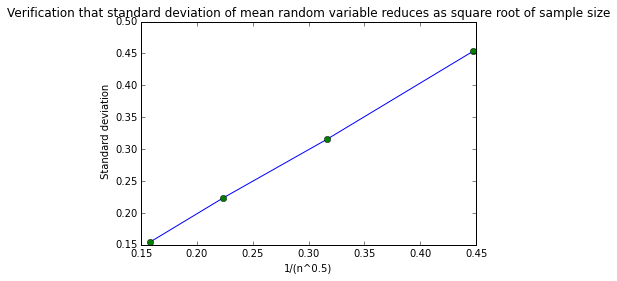

In [8]:
x = np.sqrt(np.array(x))
x = 1/x
plt.plot (x, std)
plt.plot (x, std, 'o')
plt.title("Verification that standard deviation of mean random variable reduces as square root of sample size")
plt.xlabel("1/(n^0.5)")
plt.ylabel(" Standard deviation")

In [9]:
from scipy.stats import norm
mean1 = []
mean2 = []
mean3 = []
std1 = []
std2 = []
std3 = []
size=5
values= []
meanvalues = [mean1,mean2,mean3]
stdvalues = [std1,std2,std3]
for i in range(3):
    for j in range(5000):
        values = norm(0,1).rvs(size)
        meanvalues[i].append(values.mean())
        stdvalues[i].append(values.std(ddof=1))
    size*=2
    print np.corrcoef(meanvalues[i],stdvalues[i])[0,1]

0.00586097997749
0.00161389170802
0.00698684951296


In [10]:
from scipy.stats import t
x = np.linspace(-6,6,100)

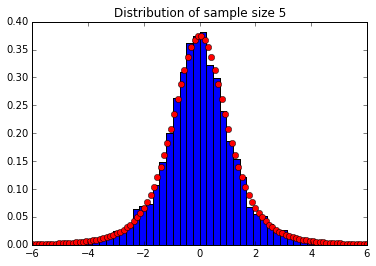

In [11]:
tdist1 = np.array(mean1)/np.array(std1) * math.sqrt(5)
plt.hist(tdist1,range = (-6,6),bins =50, normed = True)
plt.plot(x, t(4).pdf(x),'ro')
plt.title("Distribution of sample size 5")

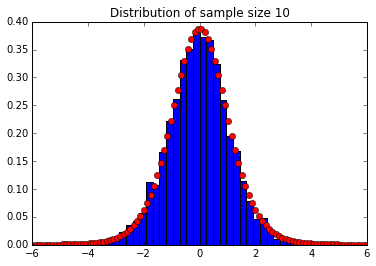

In [12]:
tdist2 = np.array(mean2)/np.array(std2) * math.sqrt(10)
plt.hist(tdist2,range = (-6,6),bins =50, normed = True)
plt.plot(x, t(9).pdf(x),'ro')
plt.title("Distribution of sample size 10")

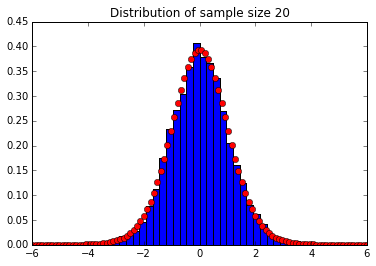

In [13]:
tdist3 = np.array(mean3)/np.array(std3) * math.sqrt(20)
plt.hist(tdist3,range = (-6,6),bins =50, normed = True)
plt.plot(x, t(19).pdf(x),'ro')
plt.title("Distribution of sample size 20")